In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
builder = tfds.ImageFolder('datasets/')
print(builder.info)

2022-07-04 22:23:32.730472: W tensorflow/core/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata".


tfds.core.DatasetInfo(
    name='image_folder',
    full_name='image_folder/1.0.0',
    description="""
    Generic image classification dataset.
    """,
    homepage='https://www.tensorflow.org/datasets/catalog/image_folder',
    data_path='datasets/',
    download_size=Unknown size,
    dataset_size=Unknown size,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'image/filename': Text(shape=(), dtype=tf.string),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=907),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=2503, num_shards=1>,
        'valid': <SplitInfo num_examples=330, num_shards=1>,
    },
    citation="""""",
)


In [9]:
def f(x, size=(128, 128)):
    x['image'] = x['image'] / 255
    output_tensor = tf.image.resize_with_crop_or_pad(x['image'], 450, 450)
    padding = (1 - tf.image.resize_with_crop_or_pad(
        tf.ones_like(x['image']), 450, 450
        )) * tf.constant([1, 1, 1], dtype=float)
    output_tensor += padding
    output_tensor = tf.image.resize(output_tensor, (size[0], size[1]))
    x['image'] = output_tensor
    return x

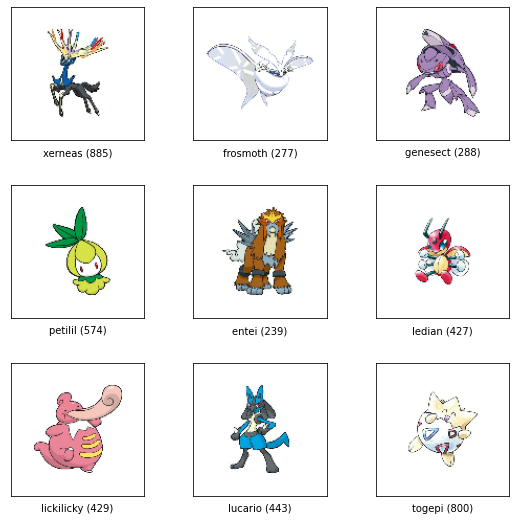

In [10]:
ds = builder.as_dataset(split='train', shuffle_files=True)
ds = ds.map(f)
tfds.show_examples(ds, builder.info)
ds = ds.batch(64)
ds = ds.as_numpy_iterator()

In [71]:
for x in ds:
    print(x['image'].shape)
    break

(64, 500, 500, 3)


2022-07-03 22:57:15.516599: W tensorflow/core/framework/op_kernel.cc:1745] OP_REQUIRES failed at whole_file_read_ops.cc:114 : NOT_FOUND: datasets/train/Decidueye/0.jpg; No such file or directory
2022-07-03 22:57:15.516715: W tensorflow/core/framework/op_kernel.cc:1745] OP_REQUIRES failed at whole_file_read_ops.cc:114 : NOT_FOUND: datasets/train/Xerneas/0.jpg; No such file or directory
2022-07-03 22:57:15.516828: W tensorflow/core/framework/op_kernel.cc:1745] OP_REQUIRES failed at whole_file_read_ops.cc:114 : NOT_FOUND: datasets/train/Darumaka/0.jpg; No such file or directory
2022-07-03 22:57:15.517485: W tensorflow/core/framework/op_kernel.cc:1745] OP_REQUIRES failed at whole_file_read_ops.cc:114 : NOT_FOUND: datasets/train/Gossifleur/0.jpg; No such file or directory
2022-07-03 22:57:15.517593: W tensorflow/core/framework/op_kernel.cc:1745] OP_REQUIRES failed at whole_file_read_ops.cc:114 : NOT_FOUND: datasets/train/Dugtrio/2.jpg; No such file or directory
2022-07-03 22:57:15.518234: W

.cc:1745] OP_REQUIRES failed at whole_file_read_ops.cc:114 : NOT_FOUND: datasets/train/Xatu/1.jpg; No such file or directory
2022-07-03 22:57:15.525316: W tensorflow/core/framework/op_kernel.cc:1745] OP_REQUIRES failed at whole_file_read_ops.cc:114 : NOT_FOUND: datasets/train/Poliwag/2.jpg; No such file or directory
2022-07-03 22:57:15.525344: W tensorflow/core/framework/op_kernel.cc:1745] OP_REQUIRES failed at whole_file_read_ops.cc:114 : NOT_FOUND: datasets/train/Sandslash/1.jpg; No such file or directory
2022-07-03 22:57:15.525360: W tensorflow/core/framework/op_kernel.cc:1745] OP_REQUIRES failed at whole_file_read_ops.cc:114 : NOT_FOUND: datasets/train/Vaporeon/0.jpg; No such file or directory
2022-07-03 22:57:15.525411: W tensorflow/core/framework/op_kernel.cc:1745] OP_REQUIRES failed at whole_file_read_ops.cc:114 : NOT_FOUND: datasets/train/Tropius/1.jpg; No such file or directory
2022-07-03 22:57:15.525596: W tensorflow/core/framework/op_kernel.cc:1745] OP_REQUIRES failed at who

In [26]:
m, v = tf.nn.moments(x['image'], axes=[0, 1, 2, 3])

In [27]:
v

<tf.Tensor: shape=(), dtype=float32, numpy=0.05042945>

In [28]:
import torch

In [31]:
torch.var(torch.tensor(x['image'])).numpy()

array(0.0504295, dtype=float32)

In [34]:
import os
import shutil
from glob import glob

In [69]:
# folders = glob('./datasets/images/*')
# print(folders[0])
# for folder in folders:
#     print(folder)
#     file_ = folder.split('/')
#     file_name = file_.pop().split('.')[-2]
#     if not os.path.exists('./datasets/valid/'+file_name):
#         os.makedirs('./datasets/valid/'+file_name)
#     file_path = glob('./datasets/images/'+file_name+'*')
#     copy_path = glob('./datasets/valid/'+file_name+'*')
#     try:
#         shutil.copy(file_path[0], copy_path[0])
#     except:
#         pass

./datasets/images/grubbin.jpg
./datasets/images/grubbin.jpg
./datasets/images/amaura.png
./datasets/images/inkay.png
./datasets/images/geodude.png
./datasets/images/heatran.png
./datasets/images/delibird.png
./datasets/images/cubchoo.png
./datasets/images/gulpin.png
./datasets/images/groudon.png
./datasets/images/joltik.png
./datasets/images/flygon.png
./datasets/images/bellsprout.png
./datasets/images/cherrim.png
./datasets/images/drifloon.png
./datasets/images/froakie.png
./datasets/images/cradily.png
./datasets/images/floatzel.png
./datasets/images/araquanid.jpg
./datasets/images/camerupt.png
./datasets/images/huntail.png
./datasets/images/greninja.png
./datasets/images/clamperl.png
./datasets/images/galvantula.png
./datasets/images/hakamo-o.jpg
./datasets/images/jangmo-o.jpg
./datasets/images/bagon.png
./datasets/images/bronzor.png
./datasets/images/elgyem.png
./datasets/images/goodra.png
./datasets/images/gastly.png
./datasets/images/axew.png
./datasets/images/fletchling.png
./dat